## Project Name: Customer Segmentation for marketing strategies 

## Information About Dataset
##### The dataset you've provided is an online retail dataset, which contains transactional data. Each row represents an individual transaction, capturing details about the products purchased, the transaction specifics, and customer information.
##### InvoiceNo: Unique transaction identifier.<br> StockCode: Unique product identifier.<br> Description: Product name or type.<br> Quantity: Number of units purchased.<br> InvoiceDate: Date and time of the transaction.<br> UnitPrice: Price per unit of the product.<br> CustomerID: Unique customer identifier.<br> Country: Customer's country.

##### Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

##### Reading the dataset

In [2]:
data = pd.read_csv('Customer_data/Online_Retail.csv')

##### Viewing the first 5 rows of the dataset

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##### Checking missing values in the dataset

In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Dropping the missing values of the CustomerID column

In [5]:
# Remove rows with missing CustomerID
clean_data = data.dropna(subset=['CustomerID'])

##### Formatting the InvoiceDate column

In [6]:
clean_data["InvoiceDate"] = pd.to_datetime(clean_data["InvoiceDate"], format="%m/%d/%Y %H:%M")

C:\Users\koira\AppData\Local\Temp\ipykernel_15500\432199332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["InvoiceDate"] = pd.to_datetime(clean_data["InvoiceDate"], format="%m/%d/%Y %H:%M")


##### Creating a new column TotalPrice 

In [7]:
clean_data["year"] = clean_data["InvoiceDate"].dt.year
clean_data['Month'] = clean_data['InvoiceDate'].dt.month_name()
clean_data['Day'] = clean_data['InvoiceDate'].dt.day_name()
clean_data['TotalPrice'] = clean_data['Quantity'] * clean_data['UnitPrice']

C:\Users\koira\AppData\Local\Temp\ipykernel_15500\2411891180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["year"] = clean_data["InvoiceDate"].dt.year
C:\Users\koira\AppData\Local\Temp\ipykernel_15500\2411891180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Month'] = clean_data['InvoiceDate'].dt.month_name()
C:\Users\koira\AppData\Local\Temp\ipykernel_15500\2411891180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

##### Finding top ten products 

In [8]:
top_ten_prod = (
    clean_data['Description'].value_counts().nlargest(10).reset_index().rename(columns={'index': 'Product_name', 'Description': 'Count'}))
top_ten_prod.columns

Index(['Count', 'count'], dtype='object')

##### Visualizing the top ten products

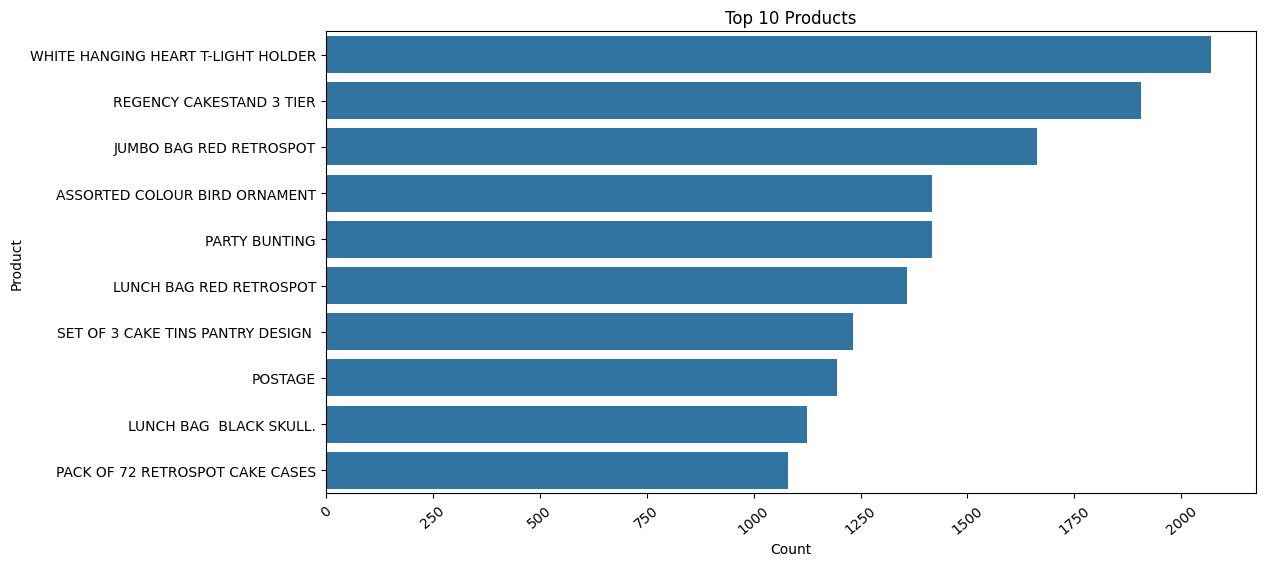

In [9]:
# Top 10 items in terms of description
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_prod['count'], y=top_ten_prod['Count'])
plt.xticks(rotation=40)
plt.title('Top 10 Products')
plt.xlabel('Count')
plt.ylabel('Product')  
plt.show()

##### Finding top five countries based on highest no. of customers

In [10]:
top_5_countries = clean_data['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries.columns

Index(['Customer_count', 'count'], dtype='object')

##### Visualizing the top five countries based on highest no. of customers

Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

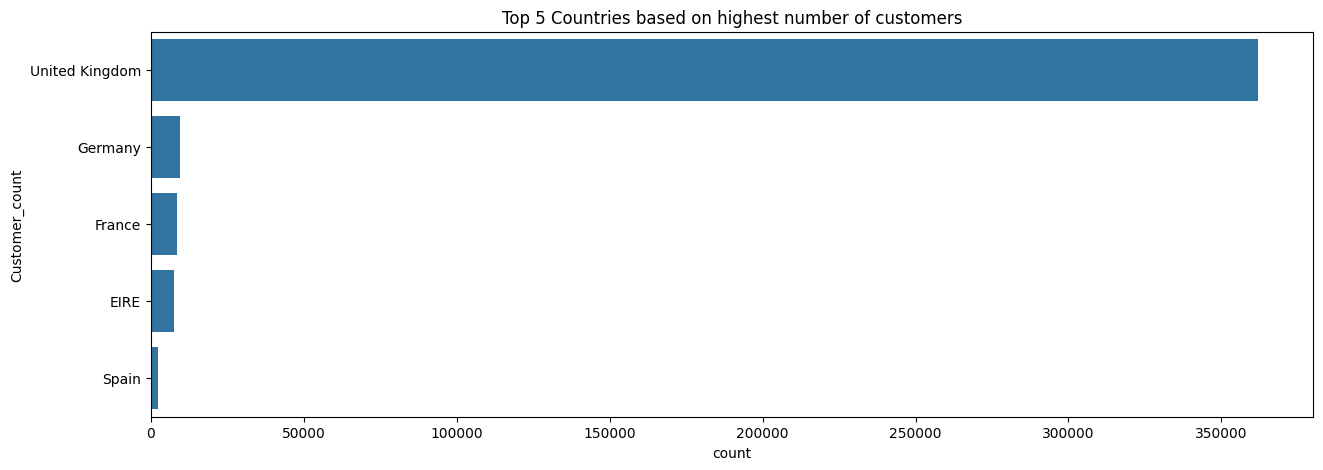

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=top_5_countries['count'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

##### Finding sales in the diffrent months 

In [12]:
sales_in_month = clean_data['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month.columns

Index(['Sales_count', 'count'], dtype='object')

##### Visualizing the sales in the diffrent months

Text(0.5, 1.0, 'Sales count in different Months')

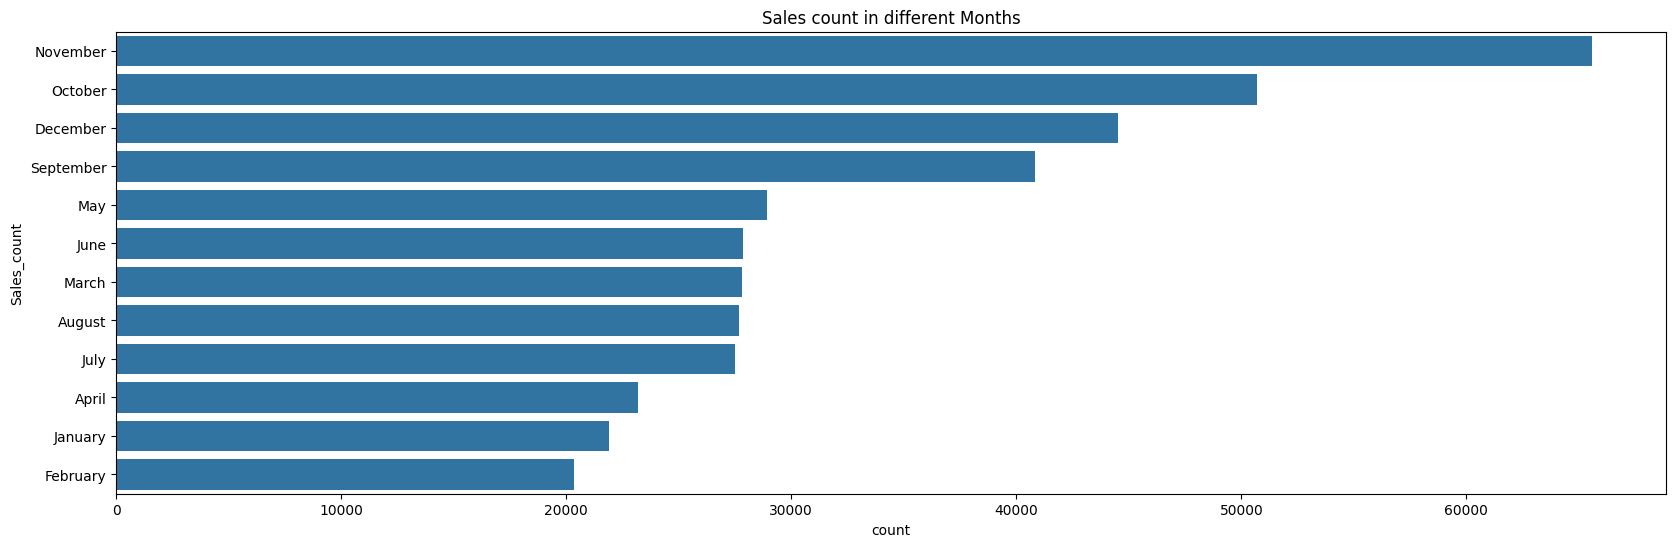

In [13]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['count'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months')

##### Aggregating data by CustomerID to count unique invoices and sum quantities and total prices

In [14]:
customer_data = clean_data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  
    'Quantity': 'sum',       
    'TotalPrice': 'sum'      
}).reset_index()

##### Renaming the columns for better understanding 

In [15]:
customer_data.columns = ['CustomerID', 'NumInvoices', 'TotalQuantity', 'TotalSpending']

##### Display the first few rows of the aggregated customer data

In [16]:
customer_data.head()

,CustomerID,NumInvoices,TotalQuantity,TotalSpending
0,12346.0,2,0,0.00
1,12347.0,7,2458,4310.00
2,12348.0,4,2341,1797.24
3,12349.0,1,631,1757.55
4,12350.0,1,197,334.40


##### Standardizing the numerical features 'NumInvoices', 'TotalQuantity', and 'TotalSpending' by scaling them to have a mean of 0 and a standard deviation of 1.

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['NumInvoices', 'TotalQuantity', 'TotalSpending']])

##### Appling K-Means clustering

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

##### Appling PCA for dimensionality reduction

In [19]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

##### Create a DataFrame with the principal components

In [20]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

##### Plotting the clusters

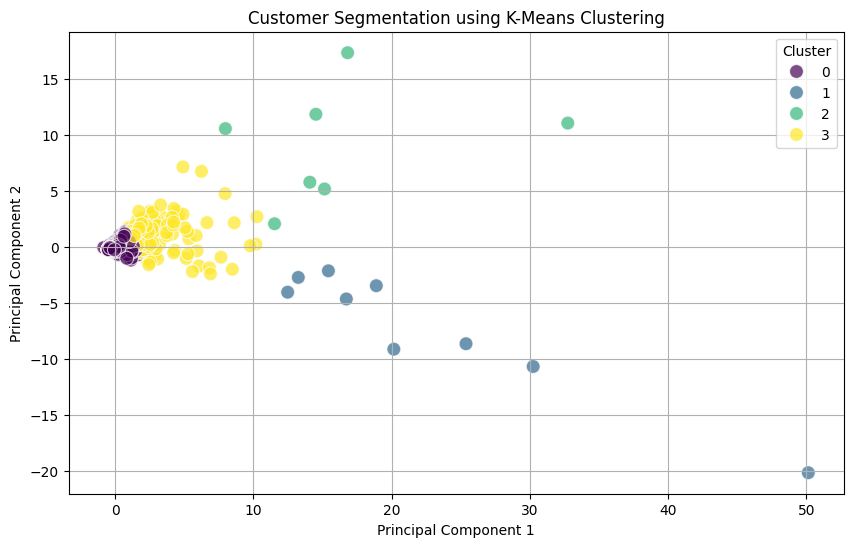

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

##### This above plot shows the distribution of customers across different clusters based on their purchasing behavior. Each color represents a different cluster, helping to identify distinct customer segments for targeted marketing strategies.

##### Appling DBSCAN clustering <br> Using eps=0.5 and min_samples=5 as initial parameters <br> These parameters might need tuning based on the data distribution

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)
pca_df['DBSCAN_Cluster'] = customer_data['DBSCAN_Cluster']

##### Visualizing the DBSCAN clustering results using PCA

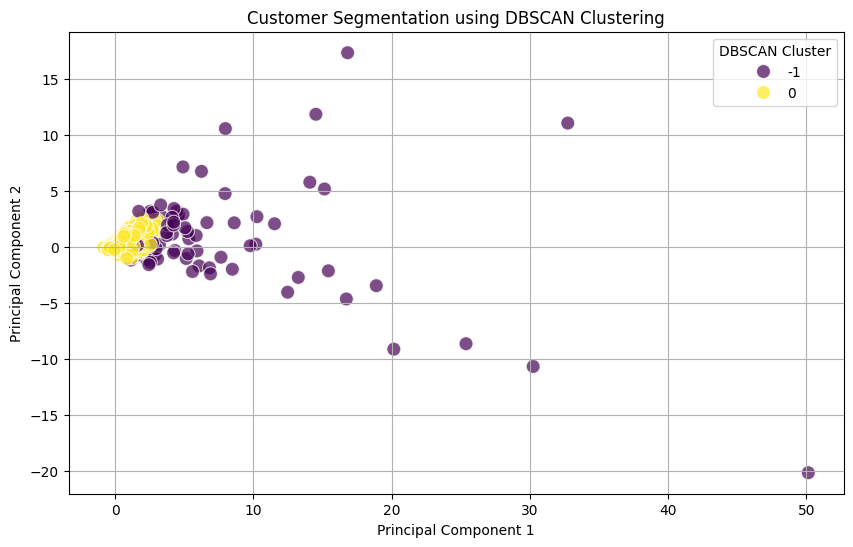

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation using DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.show()

##### Cluster -1 represents the outliers or noise points. These are typically shown in a distinct color, often gray or black, in the plot. Cluster 0 represents the main cluster of customers.